In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram


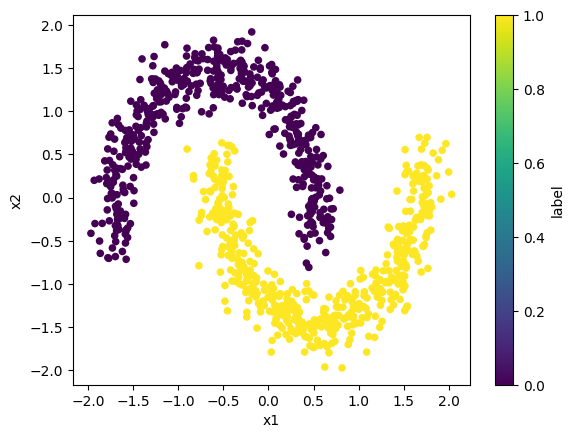

In [2]:
moons_dataset = make_moons(n_samples=1000, noise=0.1, random_state=42)

scaler = StandardScaler()
moons_df = pd.DataFrame(data=moons_dataset[0],columns=['x1','x2'])

moons_df['label'] = moons_dataset[1]
moons_df.iloc[:,:-1] = scaler.fit_transform(moons_df.iloc[:,:-1])
moons_df.plot.scatter(x='x1',y='x2',c='label',cmap='viridis')
plt.show()

حالت شهودی داده ها: به نظر میاد داده ها کروی نیستن و دیگه حالت توزیع نرمال ندارن و به صورت حلالی قرار گرفتن مقدار کمی نویز به داده ها اضافه کردم تا شکل طبیعی تری داشته باشن 

هر دو الگوریتم فاصله محور هستن ، در نتیجه اتفاقی که میوفته اینه که اسکیل کردن فاصله ها واجب میشه چون توی محاسبه فاصله تاثیر زیادی داره 

در دی بی اسکن بررسی میشه چند نقطه داخل شعاع قرار دارن ، این شعاع از طریق فاصله اقلیدسی محاسبه میشه معمولا پس به مقیاس حساس هست

هایرارکیکال هم بر اساس نزدیکی نقاط اون ها رو ادغام میکنه یعنی که به مقیاس حساس هست 

با این وجود دیتا ست ما اختلاف قابل توجهی ندارد از نظر مقیاس بین دو فیچر ، اما به هر جهت با وجودی که روی این دیتاست توجیهی نداره که اسکیل بزنیم چون تغییر خاصی ایجاد نمیشه ولی اصولی تر و بهتره که این کار رو بکنیم 

In [3]:
dbscan_labels = pd.DataFrame()


def db_scan(eps, min_samples,col_index):
    db_scan = DBSCAN(eps=eps, min_samples=min_samples)
    db_scan.fit(moons_df.iloc[:,:-1])
    dbscan_labels[f'db_scan {col_index}'] = db_scan.labels_
    moons_df.plot.scatter(x='x1',y='x2',c=dbscan_labels[f'db_scan {col_index}'],cmap='viridis')
    plt.title(f'eps={eps}, min_samples={min_samples}')
    plt.show()



روش دی بی اسکن به صورت شهودی : در این روش دو پارامتر به عنوان حداقل نمونه در دایره و شعاع به مدل میدیم 

هر نقطه مثل یک هواپیما هست که دنبال هواپیما های دیگه میگرده ! 
برد رادار بستگی به شعاع دایره داره ( در ابعاد بالا تر با نام دیگه ای شناخته میشه  )اگر حداقل نمونه تعیین شده در یک دایره وجود داشته باشه اون نقطه به عنوان مرکز شناسایی میشه 

تمام نقاط اعضای نزدیک خودشون رو بررسی میکنن و یک شبکه از اتصال ها بر اساس چگالی داده ها درست میکنن در واقع یه زنجیره متصل از نواحی همسایگی 

یعنی اگر دو دایره عضو مشترک داشته باشن ! یا یکی عضو دایره دیگه ای باشه در اون صورت اونا عضو یه خوشه هستن ! 
پس هر جا چگالی کم بشه و دیگه عضو نگیرن از خوشه خودشون نمی دونن 

A (Core) ── B (Core) ── C (Border) ── D (Core)


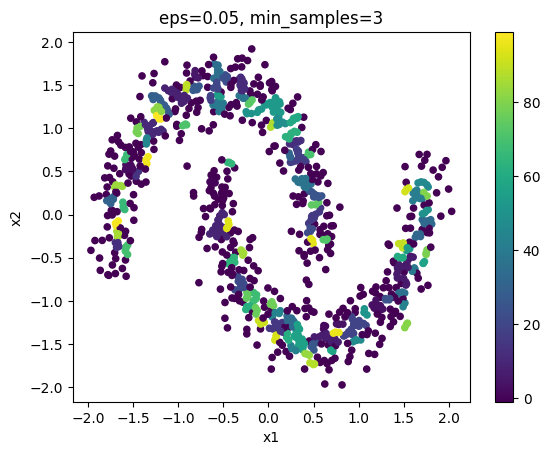

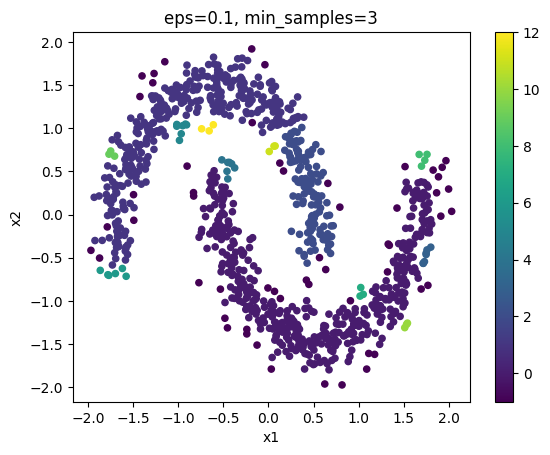

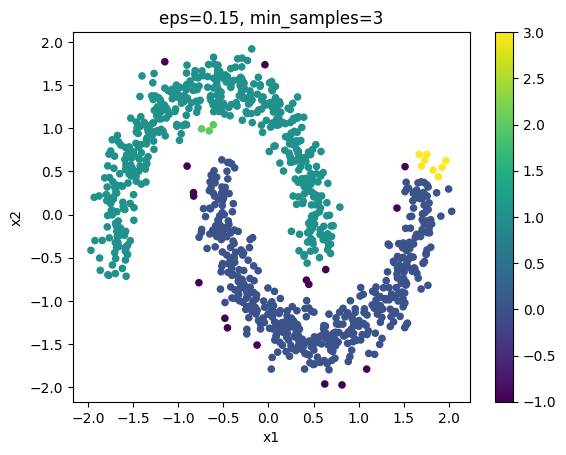

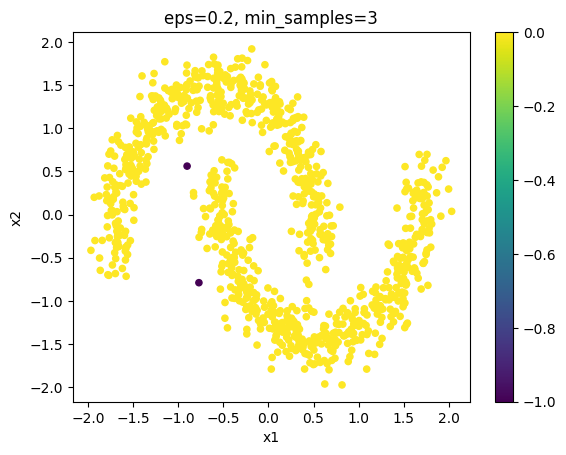

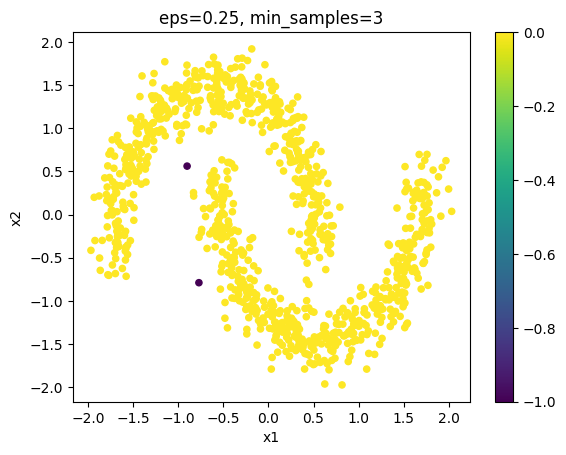

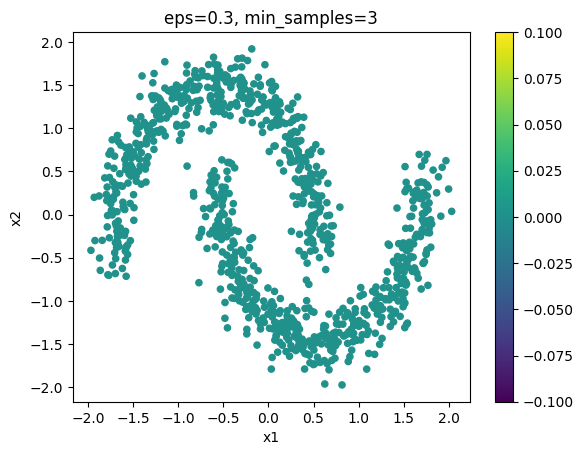

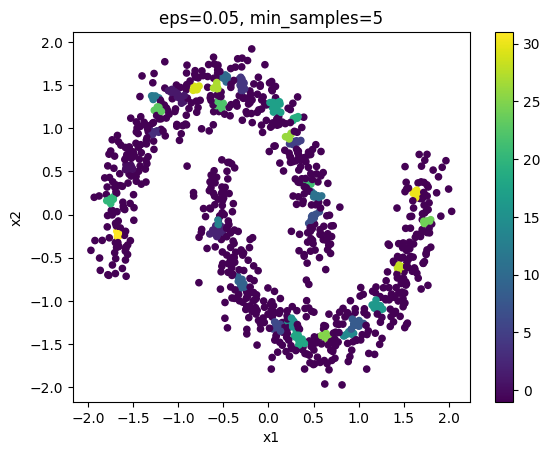

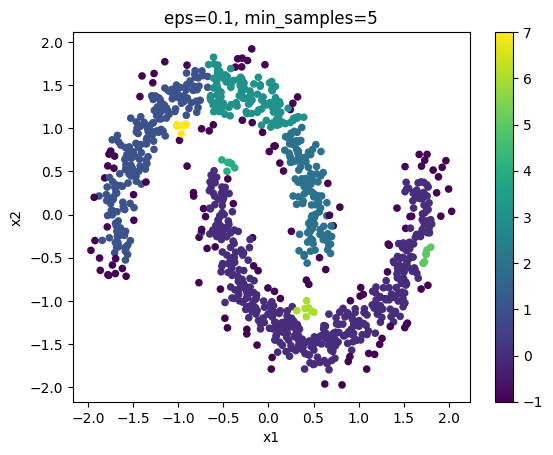

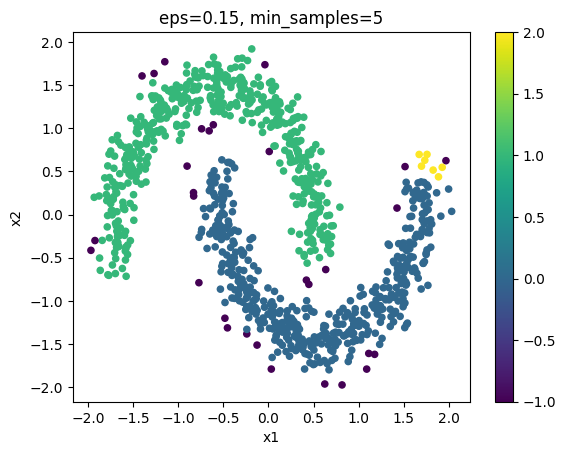

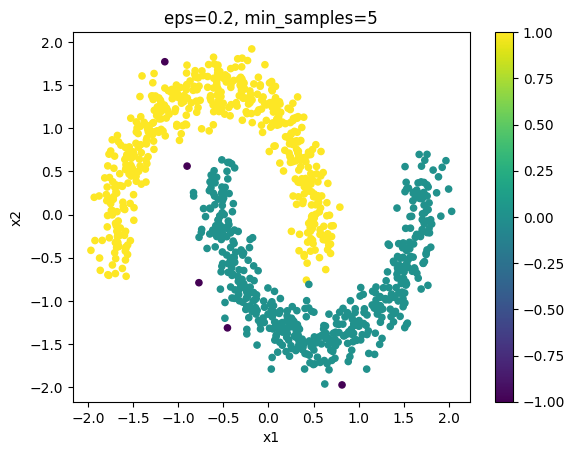

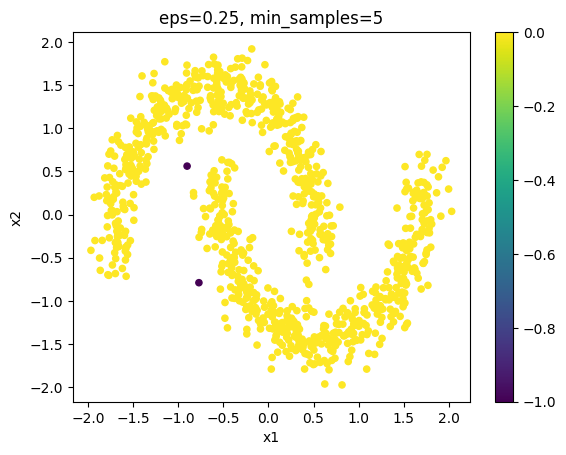

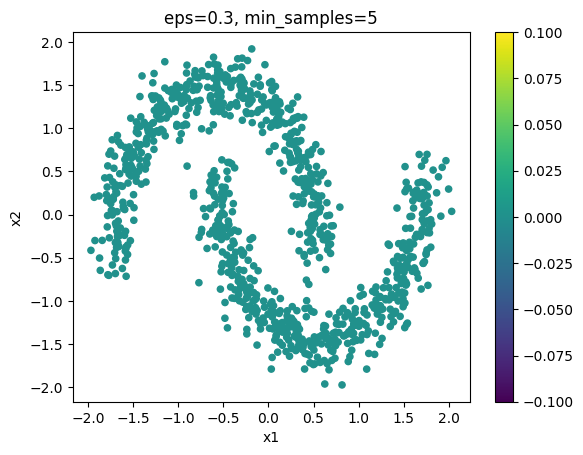

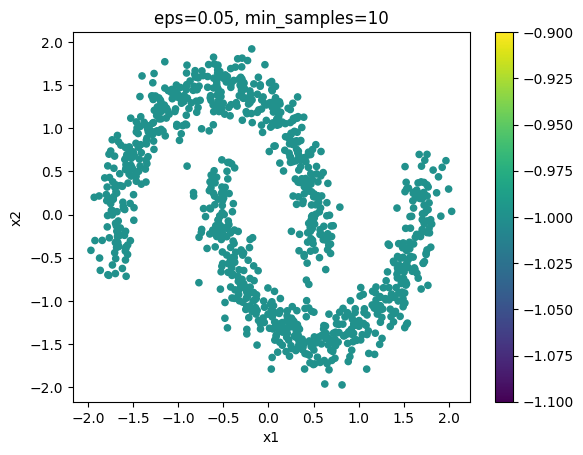

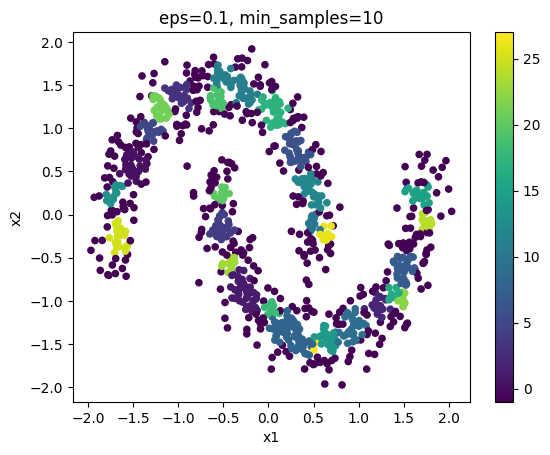

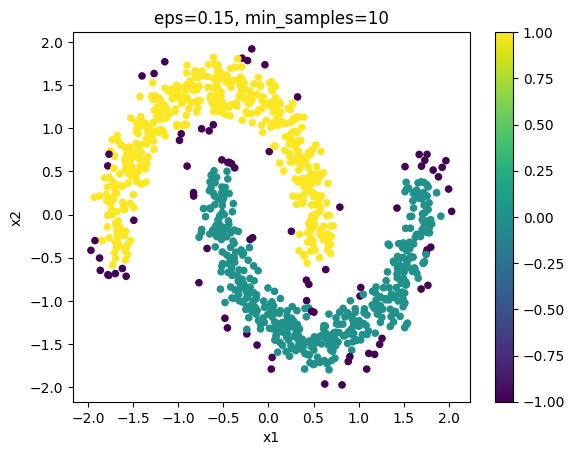

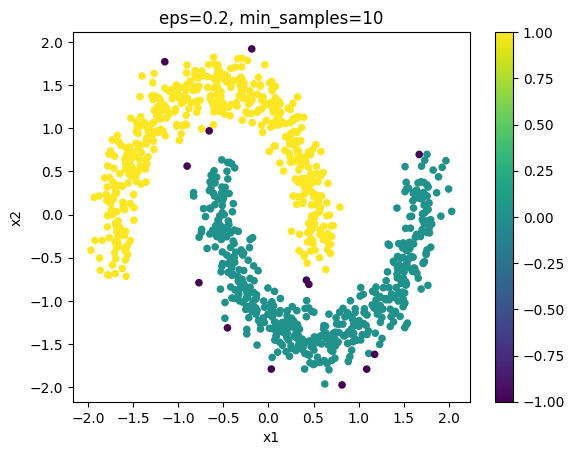

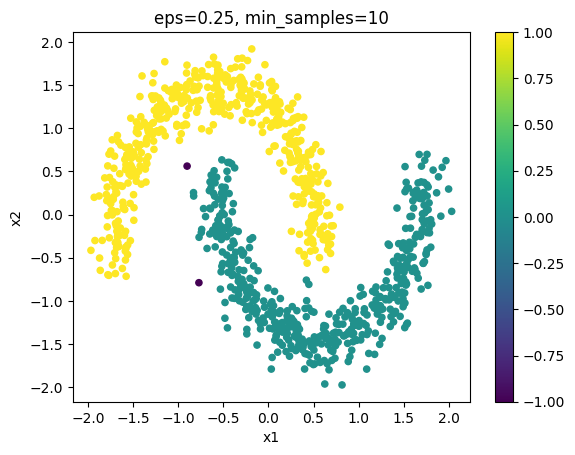

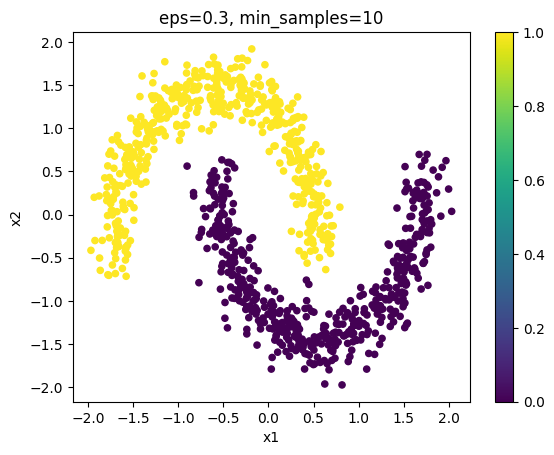

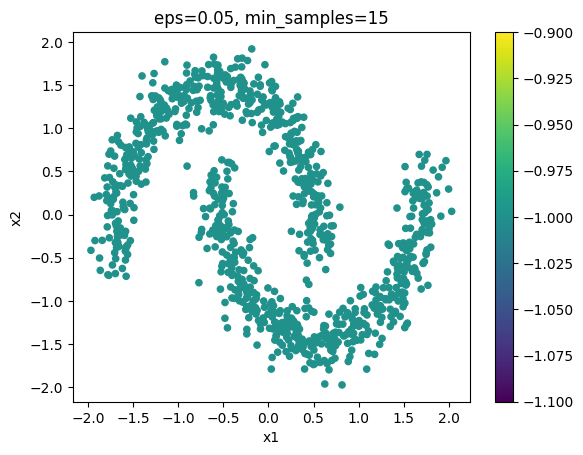

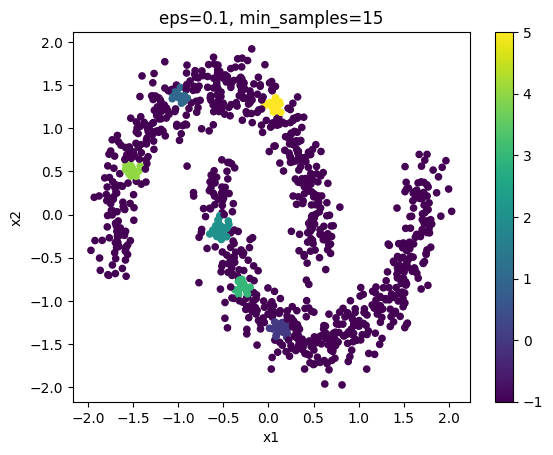

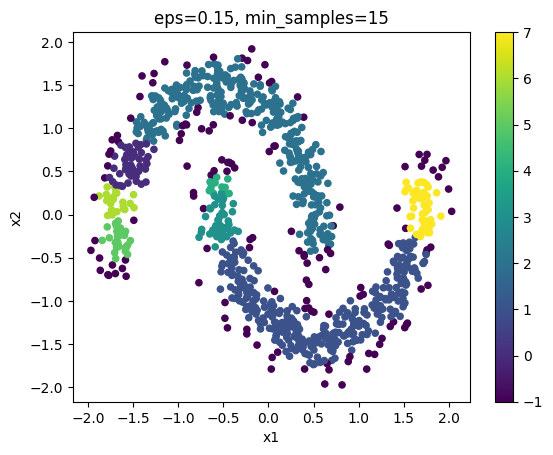

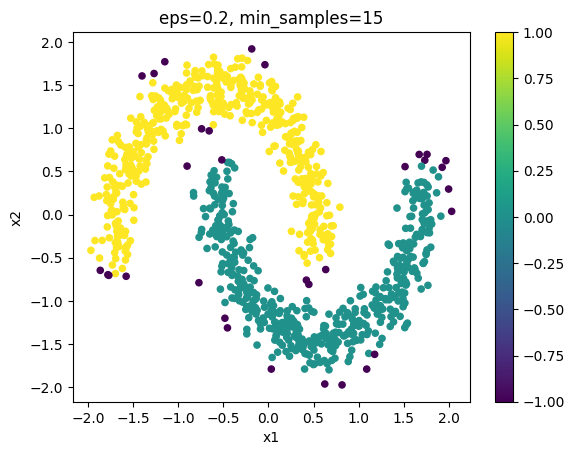

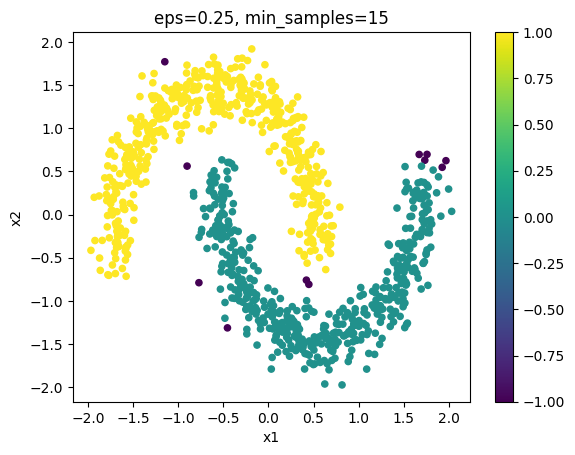

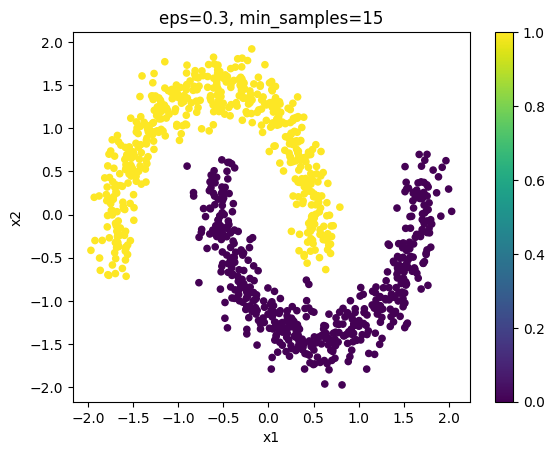

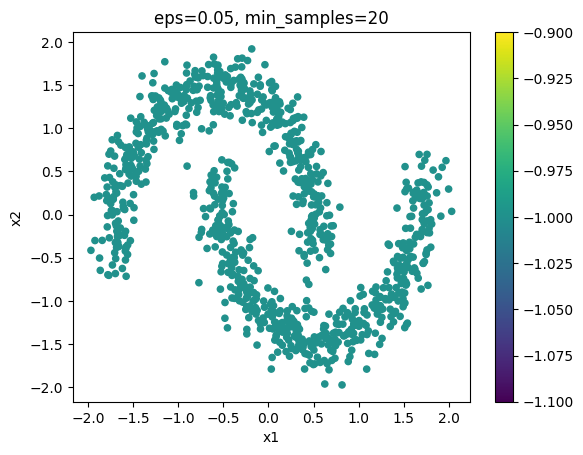

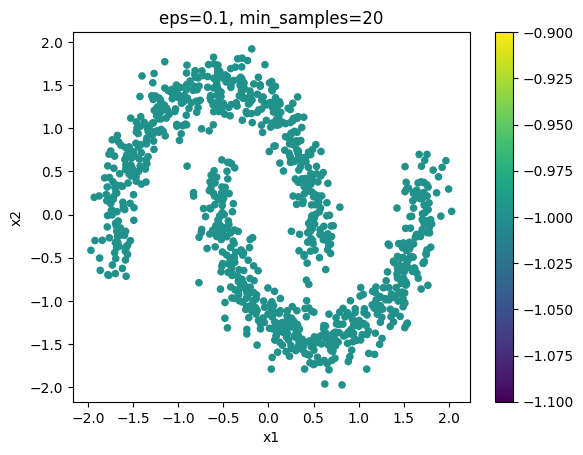

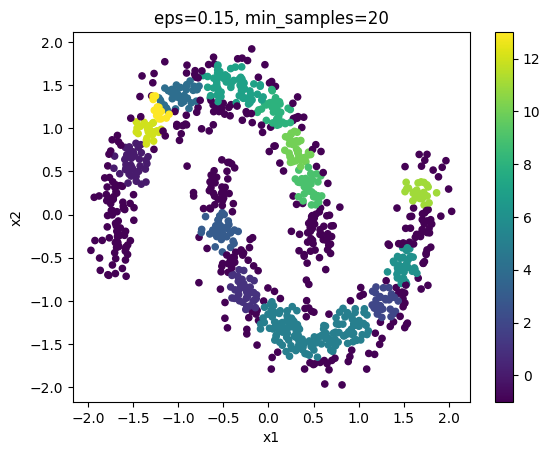

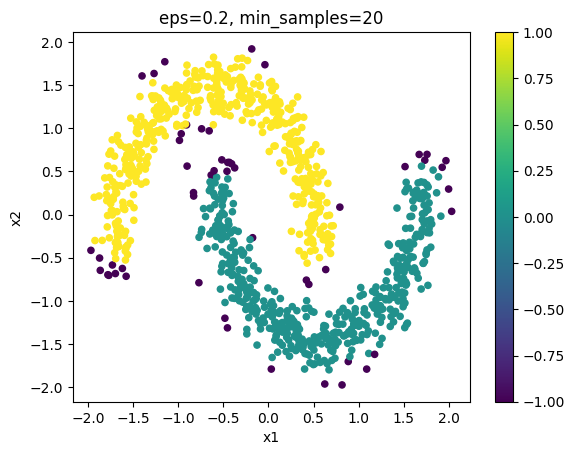

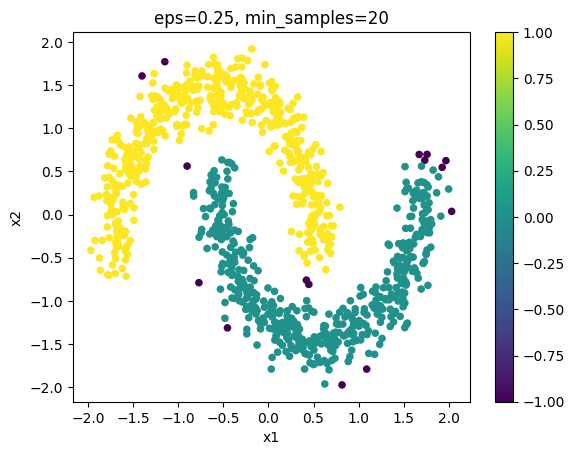

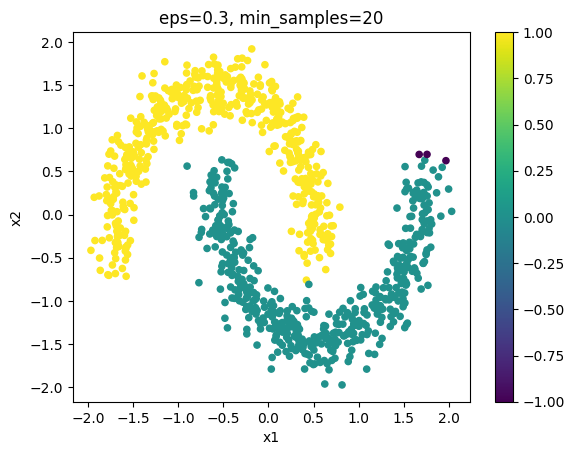

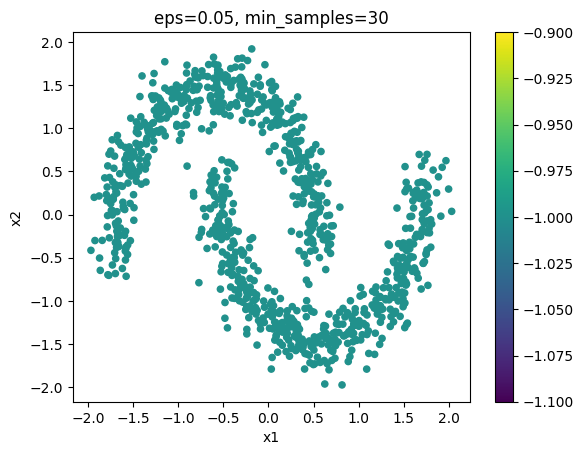

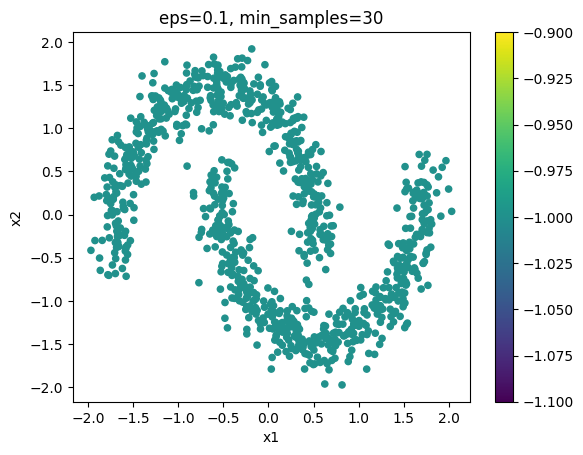

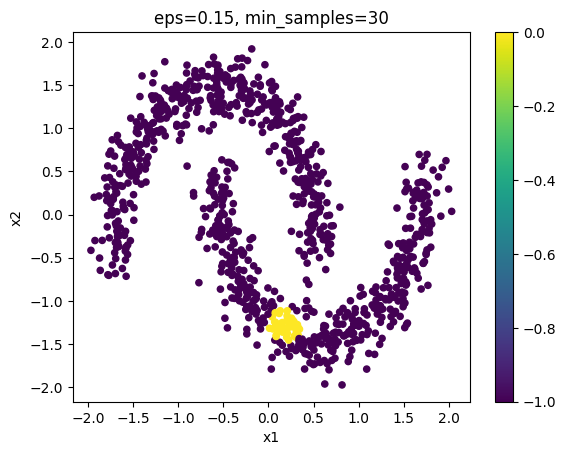

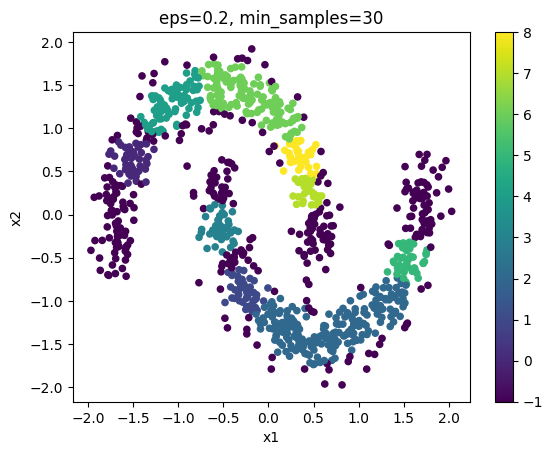

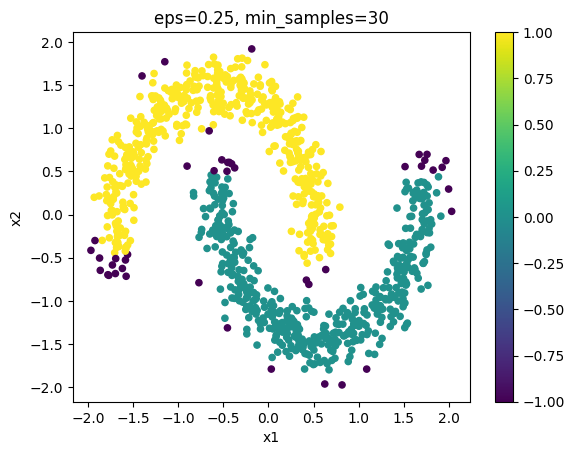

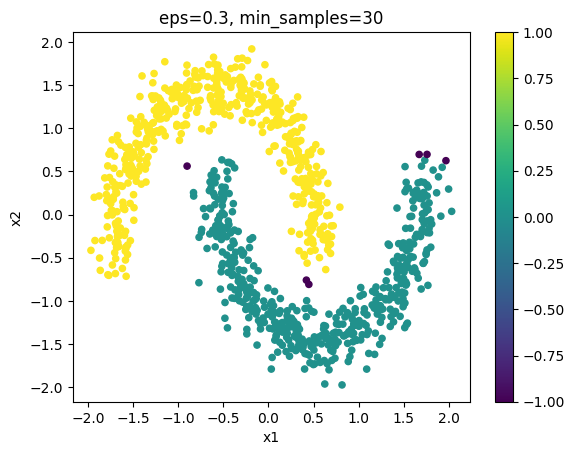

In [4]:
# DBSCAN
min_samples = [3, 5, 10, 15, 20, 30]

epsilon = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
count = 1

for i,min_sample in enumerate(min_samples):

    for j,eps in enumerate(epsilon):
        db_scan(eps, min_sample,col_index=count)
        count += 1


اتفاق بسیار جالبی که افتاد این بود که در ابتدا که شرط حداقل عضو کمتر بود ، شعاع های کوچک موفق تر در تفکیک خوشه بودند 

ولی با افزایش شرط حداقل عضو ، هیچ کدام از شعاع  های کوچک موفق به عضو گیری نشدند و این باعث شد کل خوشه یک دست شود ولی شعاع های بزرگ شرط را بر قرار کردند و به خوبی تفکیک انجام شد

In [5]:
def draw_dendrogram(df,linkage_method,title):

    Z = linkage(df.iloc[:,:-1], method=linkage_method)  

    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Distance")


In [6]:
def heirarchical_clustering(df,linkage_method,n_cluster):
    hc = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage_method)
    return hc.fit_predict(df.iloc[:,:-1])

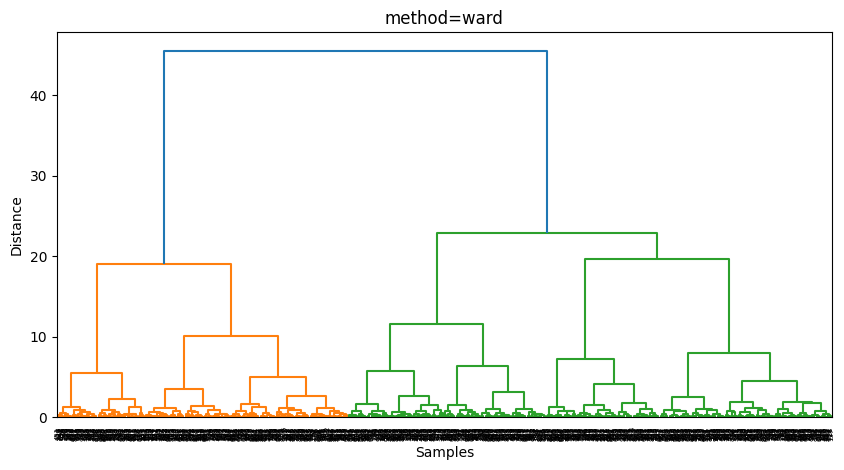

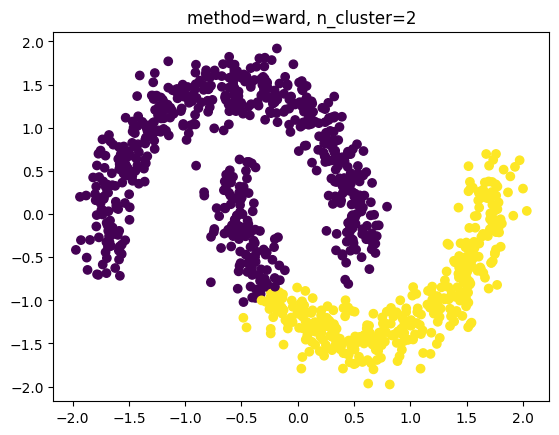

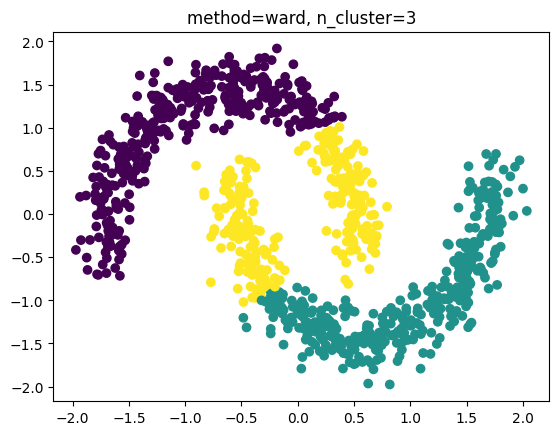

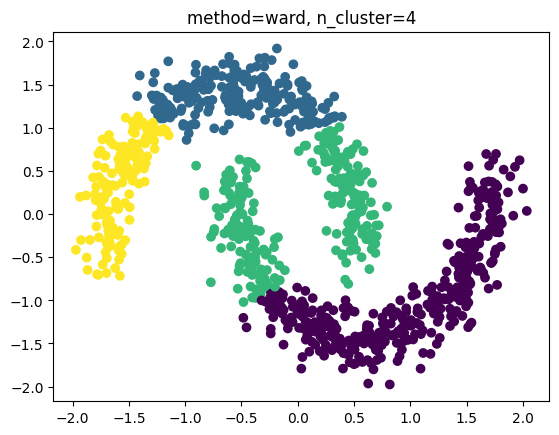

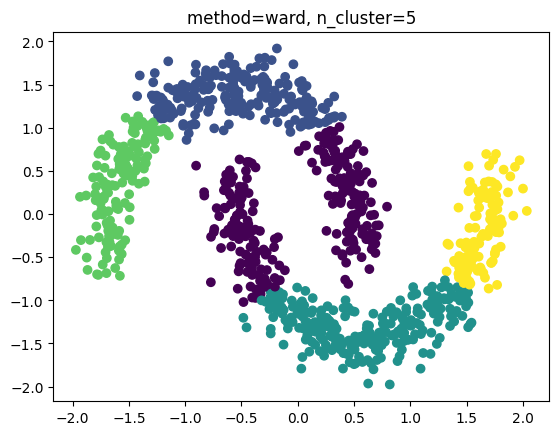

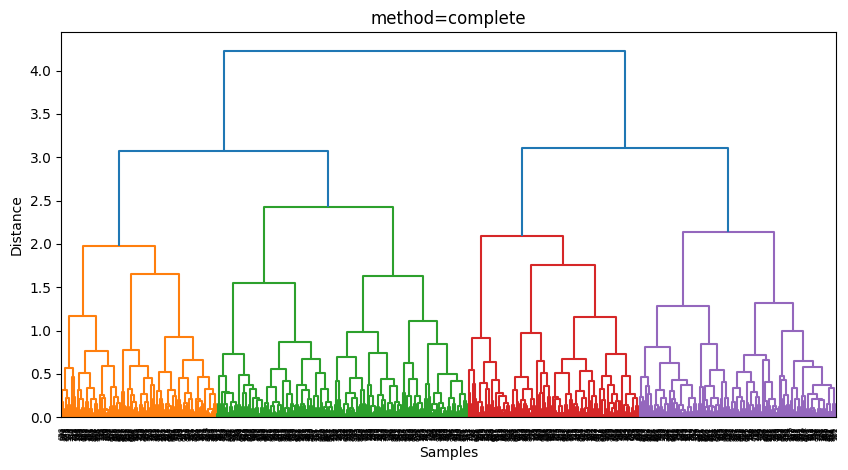

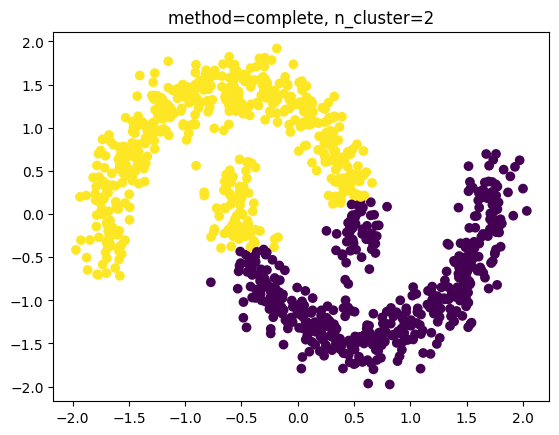

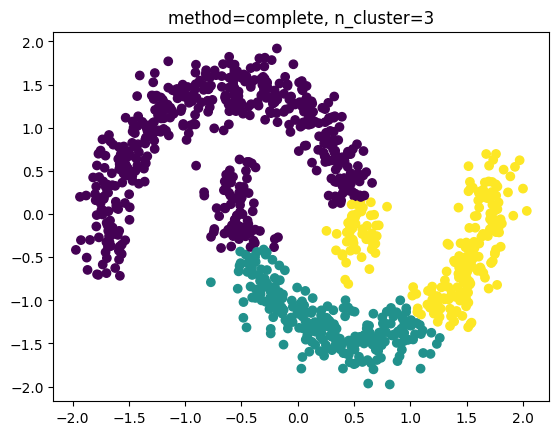

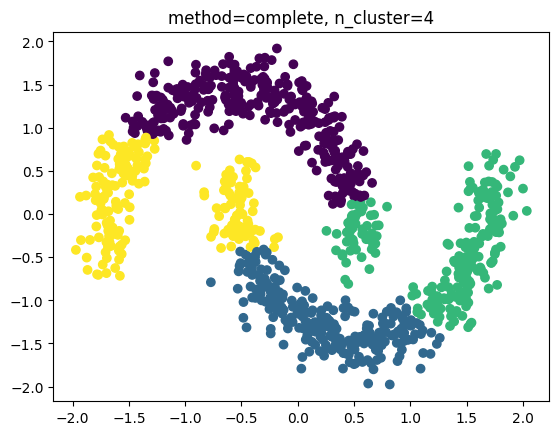

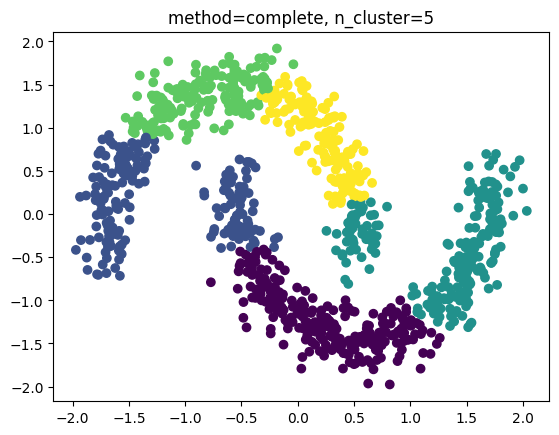

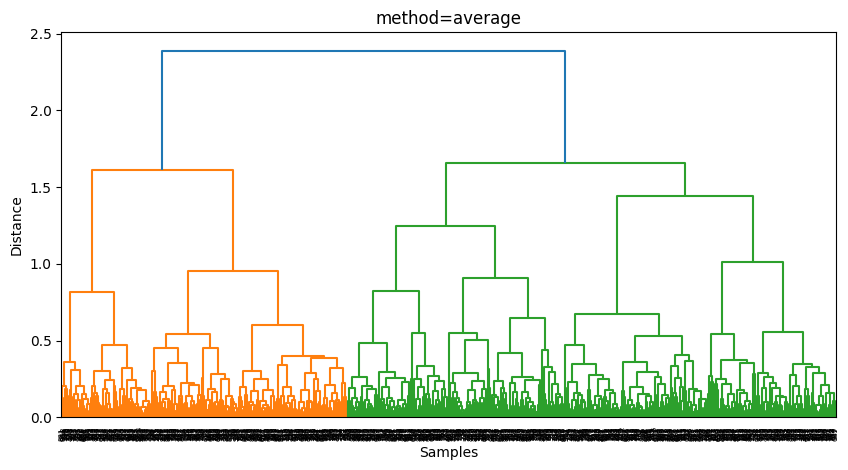

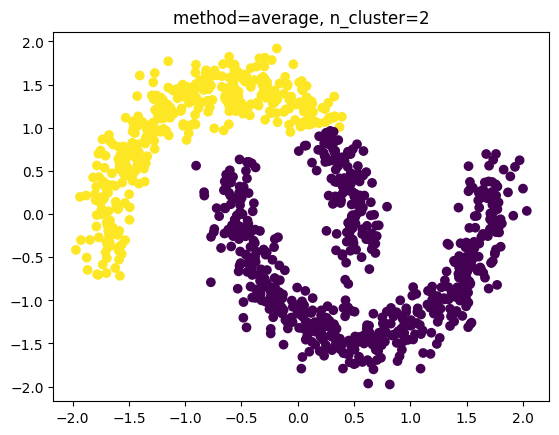

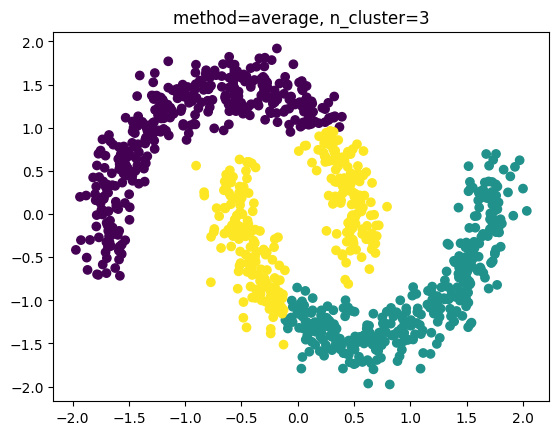

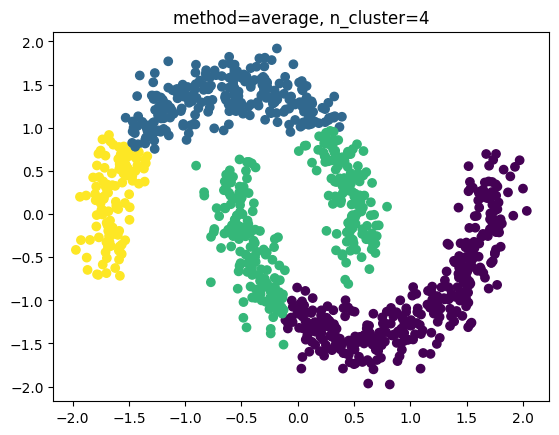

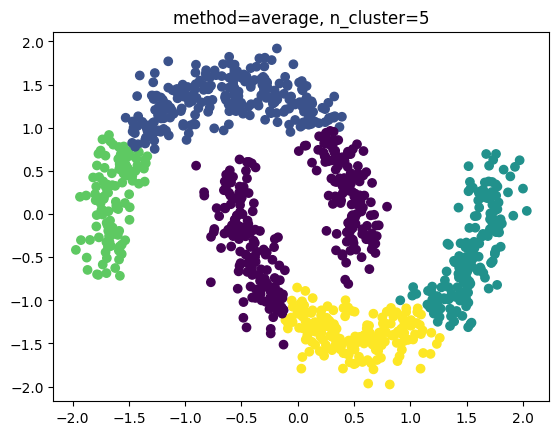

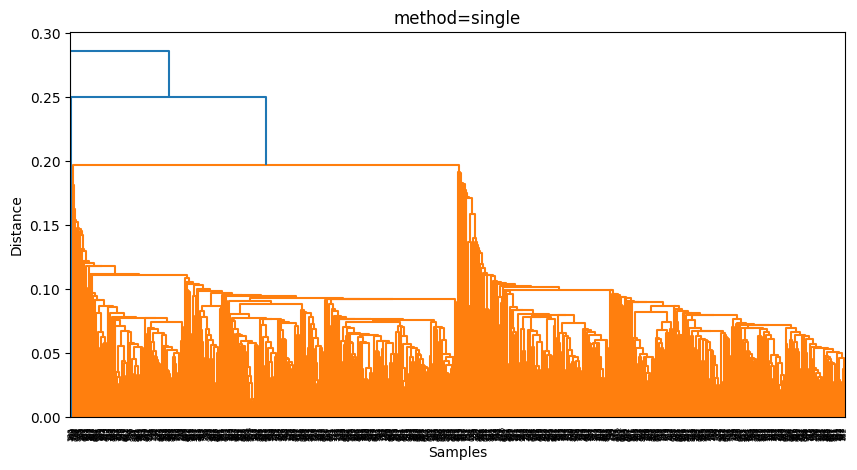

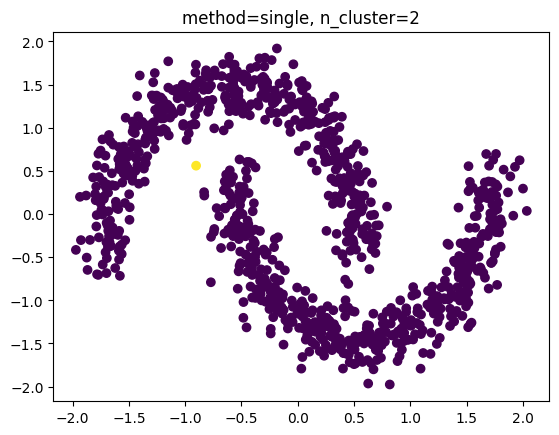

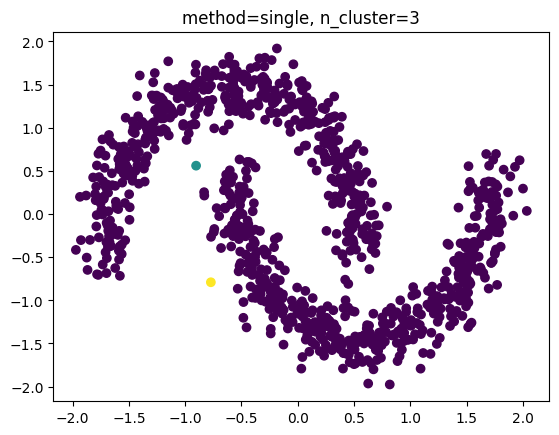

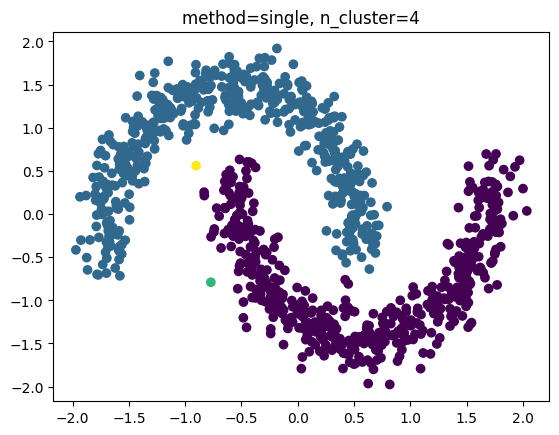

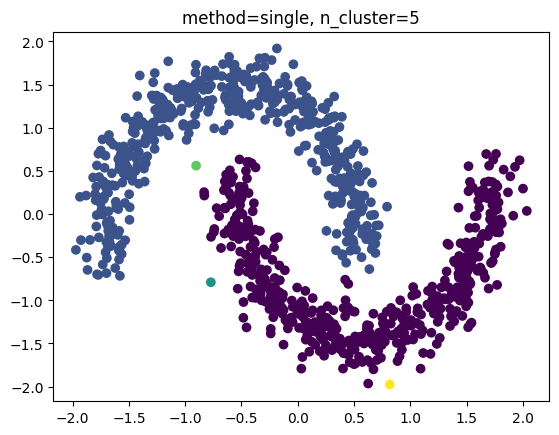

In [7]:
methods = ['ward', 'complete', 'average', 'single']
n_clusters = [2, 3, 4, 5]

for i,method in enumerate(methods):
    draw_dendrogram(moons_df,method,title=f'method={method}')
    plt.show()
    for j,n_cluster in enumerate(n_clusters):
        labels = heirarchical_clustering(moons_df,method,n_cluster)
        plt.scatter(x='x1',y='x2',c=labels,cmap='viridis',data=moons_df)
        plt.title(f'method={method}, n_cluster={n_cluster}')
        plt.show()


روش سینگل با ایجاد زنجیره مصنوعی باعث این خرابی شده 

یکی از راه هایی که برای انتخاب تعداد خوشه ها وجود دارد توجه کردن به دندروگرام هست 

که ساخته  شده از مرحله ها یا سطوح متفاوت است ، این سطوح دارای ویژگی با نام فاصله هستن که همان ارتفاع آنهاست 
و می شود از طریق پیدا کردن سطحی که ارتفاع در آن به صورت ناگهانی افزایش یافته متوجه شد که دو خوشه تفکیک شده به اجبار با هم ادغام شدن و این تفسییر از ساختار خود داده ها استخراج می شود .

در نهایت به نظر ماید وارد و کامپلیت بهترین تفکیک رو داشتن 
و کمتر خوشه ها رو به اشتباه خوردن و بدترین حالت برای سینگل بود که اصلا تشخیص نداد وجود دوتا خوشه رو 


# نتیجه و پاسخ به سوالات 

قطعا روش دی بی اسکن به شکل فوق العاده ای بهتر و منطقی تر برای تفکیک داده های هلالی طراحی شده است چرا که به دنبال تعقیب چگالی در شعاع های متفاوت میگردد

ولی روش سلسله مراتبی برای داده های  دیگر مناسب تر به نظر می آید و در نهایت در هیچ کدوم از لینک ایج های تفکیکی به خوبی دی بی اسکن نداشت

 دی بی اسکن با شناسایی چگالی بسیار کم به خوبی نقاط نویزی رو  شناسایی کرد 

ولی روش سلسله مراتبی به مراتب ! عملکرد ضعیف تری در شناسایی نویز ها داشت 

فرض الگوریتم دی بی اسکن رو در همین فایل قبل تر توضیح دادم ولی باز هم تکرار میکنم: در این الگوریتم هر نقطه مثل یک هواپیما است که یک رادار دارد که برد آن بستگی به شعاع آن دارد و یک شرط که حداقل فلان عدد عضو باید در ان دایره پیدا کند در این صورت آن دایره کور یا مرکز به حساب می آید اگر هم شرط برقرار نشود ولی داخل یک کور یا مرکز باشد بوردر میگوییم

با این رویکرد دی بی اسکن میتواند بر اساس تراکم داده ها وجود آنها را پیدا کند و در نهایت با وصل کردن تمام کور هایی که اعضای مشترک دارند خوشه می سازد 
این مسئله باعث میشود فارق از میانیگن و شکل داده که هلالی باشد یا نه ! فقط و فقط بر اساس تراکم آن خوشه را شناسایی کند و با کاهش تراکم و از بین رفتن ان مرز بین خوشه مشخص میشود 

در روش سلسله مراتبی سعی میکند بهترین خوشه برای ادغام شدن را پیدا کند ، اما بهترین خوشه بر اساس لینک ایج های مختلف میتواند معنای متفاوتی داشته باشد

مثلا در لینک ایج وارد ، رویکرد کمینه کردن واریانس است 

در لینک ایج میانگین برای سنجش فاصله بین خوشه ها و کمینه کردن این فاصله از میانگین خوشه ها استفاده میشود 

در  لینک ایج سینگل ، بر اساس نزدیک ترین فاصله بین اعضا دو خوشه فاصله شناسایی میشود که باعث میشود فقط نزدیک ترین فاصله در نظر گرفته شود و اگر سایر نقاط دیگر خوشه خیلی دور باشند مورد توجه قرار نگیرد 

در روش کامپیلیت دور ترین فاصله ملاک است و سعی در کمینه کردن فاصله بین خوشه ها هست یعنی خوشه هایی ادغام میشوند که دور ترین اعضای آنها هم به هم نزدیک باشد این باعث میشود تراکم بالاتری داشته باشند و بهتر از سینگل خوشه ها اذغام شوند

# سناریو فرضی

سناریو فرضی دی بی اسکن : فرض کنید میخواهیم داده هایی که از جی پی اس موبایل شهروندان به دست می آید را رصد کنیم 
نویز هم می تواند خطای جی پی اس باشد ، در این حالت تعداد مشخصی برای خوشه هم وجود ندارد و از طرفی شکل تجمع ها کروی نیست ! چون ممکن است به شکل خیابان ها باشد 

پس در این حالت بهترین الگوریتم دی بی اسکن است چرا که هم به خوبی نویز ها را شناسایی میکند هم در شناسایی خوشه های غیر کروی عملکرد خوبی دارد ، در ضمن در این مسئله تعداد خوشه از قبل مشخص نیست و از انجایی که این الگوریتم به تعداد  خوشه نیاز ندارد برای حل این مسئله مفید است 

سناریو فرضی سلسله مراتبی: فرض کنید تصمیم داریم رفتار مشتریان یک فروشگاه را خوشه بندی کنیم مثلا تعداد خرید میانگین مبلغ زمان خرید ها و از طرفی نویز شدیدی وجود ندارد و در نهایت تحلیل گر میخواهد سطوح مختلف خوشه بندی راببیند که می توان از دندروگرام استفاده کرد

پس الگوریتم هایرارکیکال مناسب این شرایط است چون هم میتوانیم سطوح مختلفی که مشتری ها در ان تقسیم میشوند را ببینیم هم فاصله بین خوشه ها از طریق بررسی ارتفاع سطوح 

و در نهایت بر اساس شباهت رفتار ، مشتری ها را به خوشه های متفاوت تقسیم میکنیم مثلا خوشه کم خرج ، یا خوشه دست و دلباز ، یا وقتی دقیق تر میشویم میبینیم دسته بندی های دیگری وجود دارند که فقط اول ماه خرید میکنندو... البته منظور این نیست که لیبل داریم ،منظورم این هست که هر چه به سطوح اولیه میرویم جزئیات و تنوع خوشه ها بیشتر میشود 